<a href="https://colab.research.google.com/github/Krisha-priya/digit-classification/blob/main/mnist_data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
import matplotlib.pyplot as plt

In [11]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [12]:
x_train = x_train/255.0
x_test = x_test/255.0

In [13]:
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

In [14]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 42s 47ms/step - accuracy: 0.8706 - loss: 0.4429 - val_accuracy: 0.9837 - val_loss: 0.0593
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 40s 46ms/step - accuracy: 0.9801 - loss: 0.0621 - val_accuracy: 0.9885 - val_loss: 0.0422
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 42s 48ms/step - accuracy: 0.9874 - loss: 0.0414 - val_accuracy: 0.9868 - val_loss: 0.0443
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 40s 47ms/step - accuracy: 0.9901 - loss: 0.0312 - val_accuracy: 0.9877 - val_loss: 0.0434
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.9925 - loss: 0.0240 - val_accuracy: 0.9900 - val_loss: 0.0335


In [17]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

313/313 - 2s - 7ms/step - accuracy: 0.9896 - loss: 0.0308

Test accuracy: 0.9896


In [18]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


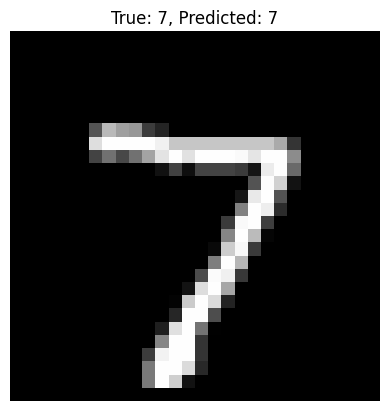

In [19]:
import numpy as np
def plot_sample(index):
  plt.imshow(x_test[index].reshape(28,28), cmap='gray')
  plt.title(f"True: {y_test[index]}, Predicted: {np.argmax(predictions[index])}")
  plt.axis('off')
  plt.show()

plot_sample(0)